# Machine Learning - Clasificación

## Librerias

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

La clasificación es un método de machine learning supervisado en el que el modelo intenta prever la etiqueta correcta de unos datos de entrada dados.

![Classification in ML](https://images.datacamp.com/image/upload/v1663850410/Machine_learning_classification_illustration_for_the_email_a993b8df37.png)


* Regresión logística. 
* Máquina de vectores de soporte. 
* Árboles de decisión. 
* Redes neuronales artificiales. 

## Ejemplos

* Durante la pandemia de COVID, se implementaron modelos de machine learning para prever con eficiencia si una persona tenía COVID o no. 
* La clasificación de los documentos por categoría. 
* Análisis de las opiniones de los alumnos sobre un profesor.  


## Tipos de Clasificación

### Binaria

En una tarea de clasificación binaria, el objetivo es clasificar los datos de entrada en dos categorías mutuamente excluyentes. En tal situación, los datos de entrenamiento se etiquetan con formato binario: verdadero y falso; positivo y negativo; O y 1; spam y no spam, etc.,

![Binary Classification](https://images.datacamp.com/image/upload/v1663850409/Binary_classification_task_ec3247c7d2.png)

### Multiclase

La clasificación multiclase, por otra parte, tiene al menos dos etiquetas de clase mutuamente excluyentes, donde el objetivo es prever a qué clase pertenece un ejemplo de entrada dado.

![Multiclass Clasification](https://images.datacamp.com/image/upload/v1663850409/3_class_classification_task_a2ce612356.png)

### Métricas para evaluar los algoritmos de clasificación

![Metrics](https://images.datacamp.com/image/upload/v1663850414/Metrics_to_Evaluate_Machine_Learning_Classification_Algorithms_1_bd0121cfef.png)

![Metrics 2](https://images.datacamp.com/image/upload/v1664183033/updated_6c10fd818f.png)



## Regresión Logistica

En una regresión, vamos a super que tenemos una función entre $x$ e $y$ de siguiente forma:
$
\begin{align}
y = 2x
\end{align}
$
<div style="display: flex; justify-content: center; align-items: center; height: 300px;">
    <img src="https://d1.awsstatic.com/logistic-regression.365a4d224b30e886e8f74e000fba3420c076e3ca.png" alt="Regresion">
</div>

La regresión logística es un modelo estadístico que utiliza ***la función logística, o función logit***, en matemáticas como la ecuación entre $x$ e $y$. La función logit mapea y como una función sigmoidea de $x$.

$
\begin{align}
f(x) = \frac{1}{1 + e^{-x}}
\end{align}
$

<div style="display: flex; justify-content: center; align-items: center; height: 300px;">
    <img src="https://d1.awsstatic.com/S-curve.36de3c694cafe97ef4e391ed26a5cb0b357f6316.png" alt="Sigmoid">
</div>

la función logit devuelve ***solo valores entre 0 y 1 para la variable dependiente***, al margen de los valores de la variable independiente. Así es como la regresión logística estima el valor de la variable dependiente

### Carga y preprocesado de datos

In [3]:
df = pd.read_csv(
    "Social_Network_Ads.csv"
)

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [8]:
df["Purchased"].unique()

array([0, 1])

In [6]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

### Escalado de variables

In [10]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Entrenamiento del modelo de Regresión Logística en el train dataset

In [11]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Predicciones con test dataset

#### Método `predict()`

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [14]:
cm = confusion_matrix(y_test, y_pred)

In [15]:
cm

array([[65,  3],
       [ 8, 24]])

C:\Users\screy\AppData\Local\Temp\ipykernel_28644\2613880327.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


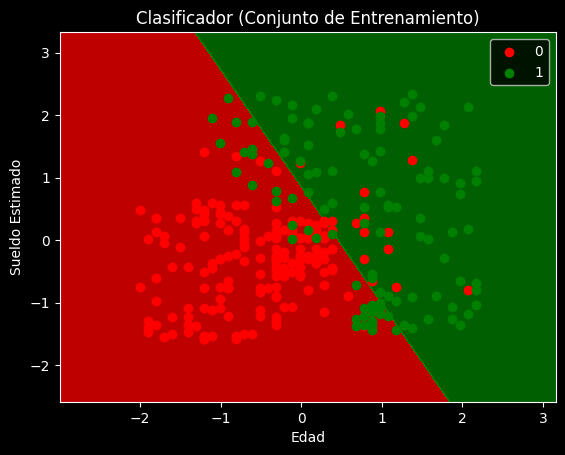

In [17]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
)
plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("red", "green")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("red", "green"))(i),
        label=j,
    )
plt.title("Clasificador (Conjunto de Entrenamiento)")
plt.xlabel("Edad")
plt.ylabel("Sueldo Estimado")
plt.legend()
plt.show()

C:\Users\screy\AppData\Local\Temp\ipykernel_28644\3139502444.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


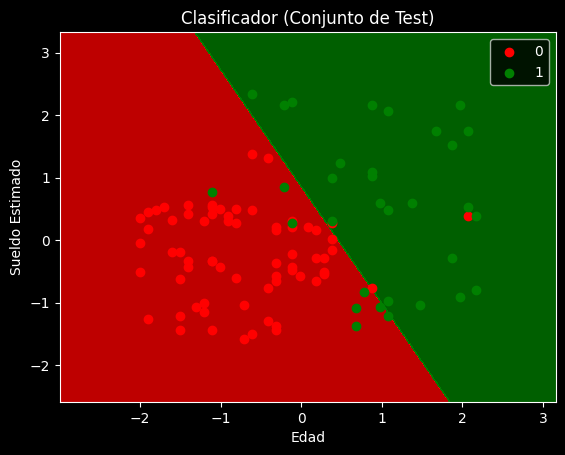

In [18]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
)
plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("red", "green")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("red", "green"))(i),
        label=j,
    )
plt.title("Clasificador (Conjunto de Test)")
plt.xlabel("Edad")
plt.ylabel("Sueldo Estimado")
plt.legend()
plt.show()

#### Método `predict_proba()`

In [35]:
y_pred = classifier.predict_proba(X_test)

In [36]:
y_pred # Devuelve un array donde [clase negativa (0), clase positiva (1)]

array([[0.88724662, 0.11275338],
       [0.83320406, 0.16679594],
       [0.80547266, 0.19452734],
       [0.91055238, 0.08944762],
       [0.90251404, 0.09748596],
       [0.99212588, 0.00787412],
       [0.98485118, 0.01514882],
       [0.26785182, 0.73214818],
       [0.99418975, 0.00581025],
       [0.49572395, 0.50427605],
       [0.96394336, 0.03605664],
       [0.97080548, 0.02919452],
       [0.83932842, 0.16067158],
       [0.63038349, 0.36961651],
       [0.98450568, 0.01549432],
       [0.66509089, 0.33490911],
       [0.72014373, 0.27985627],
       [0.9877452 , 0.0122548 ],
       [0.01140279, 0.98859721],
       [0.95797872, 0.04202128],
       [0.91068521, 0.08931479],
       [0.03669369, 0.96330631],
       [0.72299248, 0.27700752],
       [0.11789044, 0.88210956],
       [0.99551006, 0.00448994],
       [0.02705318, 0.97294682],
       [0.92231555, 0.07768445],
       [0.92371094, 0.07628906],
       [0.80658112, 0.19341888],
       [0.84340607, 0.15659393],
       [0.

In [37]:
y_prob = y_pred[:, 1]
threshold = 0.7  # Umbral ajustado
y_prob = (y_prob >= threshold).astype(int)  # Predicciones binarias según el umbral

In [38]:
y_prob

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

TypeError: Shapes of x (592, 616) and z (364672, 2) do not match

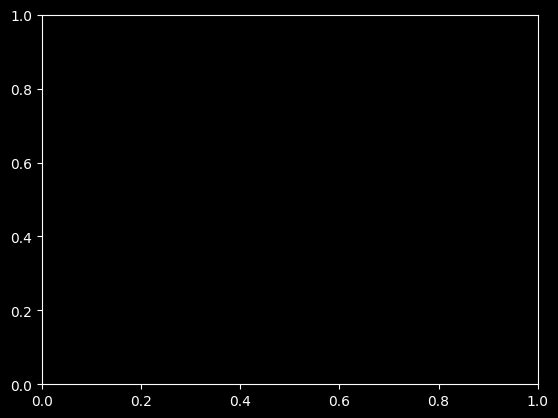

In [47]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
)

predicts = classifier.predict_proba(np.array([X1.ravel(), X2.ravel()]).T)
predicts = (predicts >= threshold).astype(int)

plt.contourf(
    X1,
    X2,
    predicts,
    alpha=0.75,
    cmap=ListedColormap(("red", "green")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("red", "green"))(i),
        label=j,
    )
plt.title(
    f"Clasificador con unmbral ajustado de {threshold * 100:.0f}%  (Conjunto de Test)"
)
plt.xlabel("Edad")
plt.ylabel("Sueldo Estimado")
plt.legend()
plt.show()